Fetching updates from 2022-06-01T00:00:00 to 2022-06-03T00:00:00
Number of updates found: 408384
Fetching updates from 2022-06-03T00:00:00 to 2022-06-05T00:00:00
Number of updates found: 362180
Fetching updates from 2022-06-05T00:00:00 to 2022-06-07T00:00:00
Number of updates found: 248350
Fetching updates from 2022-06-07T00:00:00 to 2022-06-09T00:00:00
Number of updates found: 933427
Fetching updates from 2022-06-09T00:00:00 to 2022-06-11T00:00:00
Number of updates found: 295409
Fetching updates from 2022-06-11T00:00:00 to 2022-06-13T00:00:00
Number of updates found: 215197
Fetching updates from 2022-06-13T00:00:00 to 2022-06-15T00:00:00
Failed to fetch data: 502. Retrying... (1/3)
Number of updates found: 664295
Fetching updates from 2022-06-15T00:00:00 to 2022-06-17T00:00:00
Number of updates found: 335891
Fetching updates from 2022-06-17T00:00:00 to 2022-06-19T00:00:00
Number of updates found: 378588
Fetching updates from 2022-06-19T00:00:00 to 2022-06-21T00:00:00
Number of updates

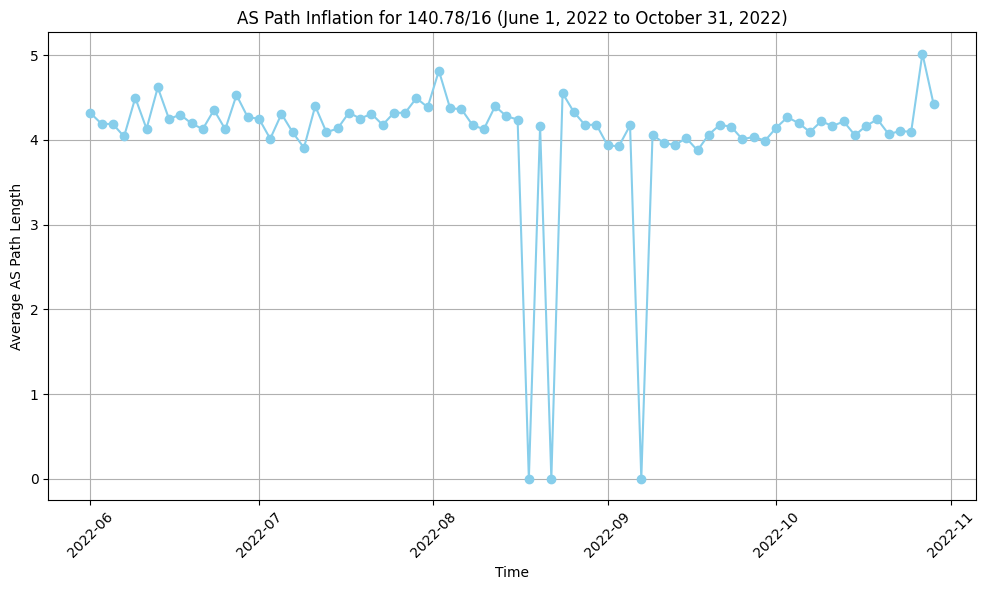

In [1]:
import requests
import datetime
import matplotlib.pyplot as plt
import time

# Function to fetch BGP updates from RIPEstat
def get_bgp_updates(resource, start_time, end_time, max_retries=3):
    url = f"https://stat.ripe.net/data/bgp-updates/data.json?resource={resource}&starttime={start_time}&endtime={end_time}"
    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and 'updates' in data['data']:
                    return data['data']['updates']
                else:
                    print("No updates found in the response.")
                    return []
            else:
                print(f"Failed to fetch data: {response.status_code}. Retrying... ({attempt + 1}/{max_retries})")
        except Exception as e:
            print(f"Error: {e}. Retrying... ({attempt + 1}/{max_retries})")
        time.sleep(5)
    print(f"Max retries reached for interval: {start_time} to {end_time}. Skipping this interval.")
    return []

# Convert datetime to the required format
def datetime_to_string(dt):
    return dt.strftime('%Y-%m-%dT%H:%M:%S')

# Define the time range
start_time = datetime.datetime(2022, 6, 1)
end_time = datetime.datetime(2022, 10, 31)

# Resource of interest
resource = "AS9541"

# Initialize lists to store time intervals and corresponding average AS path lengths
time_intervals = []
avg_as_path_lengths = []

# Divide time range into 2-day chunks and fetch updates
current_time = start_time
while current_time < end_time:
    next_time = current_time + datetime.timedelta(days=2)
    start_time_str = datetime_to_string(current_time)
    end_time_str = datetime_to_string(next_time)
    print(f"Fetching updates from {start_time_str} to {end_time_str}")
    updates = get_bgp_updates(resource, start_time_str, end_time_str)
    
    # Check if updates are received for the current interval
    if not updates:
        print(f"No updates found for interval: {start_time_str} to {end_time_str}")
    else:
        print(f"Number of updates found: {len(updates)}")

    # Extract AS path lengths for the current interval
    as_path_lengths = []
    for update in updates:
        if 'attrs' in update and 'path' in update['attrs']:
            as_path = update['attrs']['path']
            as_path_lengths.append(len(as_path))
    
    # Calculate and store the average AS path length for the current interval
    if as_path_lengths:
        avg_as_path_length = sum(as_path_lengths) / len(as_path_lengths)
    else:
        avg_as_path_length = 0
    time_intervals.append(current_time)
    avg_as_path_lengths.append(avg_as_path_length)
    
    current_time = next_time

# Plot AS path inflation
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, avg_as_path_lengths, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Time')
plt.ylabel('Average AS Path Length')
plt.title('AS Path Inflation for 140.78/16 (June 1, 2022 to October 31, 2022)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
